In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [14]:
load = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df=pd.DataFrame(load.values, columns=["Age", "Workclass", "Fnlwgt", "Education","Education_num","Marital_status","Occupation","Relationship","Race","Sex","Capital_gain","Capital_loss","Hours_per_week","Native_country","Income"])

In [18]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Exploration

In [19]:
pd.unique(df[['Income']].values.ravel('K'))

array([' <=50K', ' >50K'], dtype=object)

In [20]:
pd.unique(df[['Native_country']].values.ravel('K'))

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [21]:
df.shape

(32561, 15)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null object
Workclass         32561 non-null object
Fnlwgt            32561 non-null object
Education         32561 non-null object
Education_num     32561 non-null object
Marital_status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_gain      32561 non-null object
Capital_loss      32561 non-null object
Hours_per_week    32561 non-null object
Native_country    32561 non-null object
Income            32561 non-null object
dtypes: object(15)
memory usage: 3.7+ MB


In [24]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,73,9,21648,16,16,7,15,6,5,2,119,92,94,42,2
top,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,898,22696,13,10501,10501,14976,4140,13193,27816,21790,29849,31042,15217,29170,24720


In [21]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### Delete Duplicate rows

In [15]:
df=df.drop_duplicates(keep='first')

In [39]:
df.shape

(32537, 15)

### Data Analysis and enrichments

In [16]:
df.Income = df.Income.map({' >50K':1, ' <=50K':0})

In [41]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [53]:
df.Income.value_counts()

0    24720
1     7841
Name: Income, dtype: int64

In [73]:
df.dtypes

Age                 int8
Workclass         object
Fnlwgt             int32
Education         object
Education_num     object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain      object
Capital_loss      object
Hours_per_week    object
Native_country    object
Income             int64
dtype: object

In [17]:
df['Age']=pd.to_numeric(df['Age'], downcast='integer')

In [18]:
df['Fnlwgt'] = df['Fnlwgt'].astype(int)

In [19]:
df['Capital_gain'] = df['Capital_gain'].astype(int) 

In [20]:
df['Capital_loss'] = df['Capital_loss'].astype(int)  

In [21]:
df['Hours_per_week'] = df['Hours_per_week'].astype(int)   

In [77]:
df.dtypes

Age                 int8
Workclass         object
Fnlwgt             int32
Education         object
Education_num     object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int32
Capital_loss       int32
Hours_per_week     int32
Native_country    object
Income             int64
dtype: object

In [22]:
df['Age'].astype(int, copy=True)

0        39
1        50
2        38
3        53
4        28
5        37
6        49
7        52
8        31
9        42
10       37
11       30
12       23
13       32
14       40
15       34
16       25
17       32
18       38
19       43
20       40
21       54
22       35
23       43
24       59
25       56
26       19
27       54
28       39
29       49
         ..
32531    30
32532    34
32533    54
32534    37
32535    22
32536    34
32537    30
32538    38
32539    71
32540    45
32541    41
32542    72
32543    45
32544    31
32545    39
32546    37
32547    43
32548    65
32549    43
32550    43
32551    32
32552    43
32553    32
32554    53
32555    22
32556    27
32557    40
32558    58
32559    22
32560    52
Name: Age, Length: 32537, dtype: int32

### Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

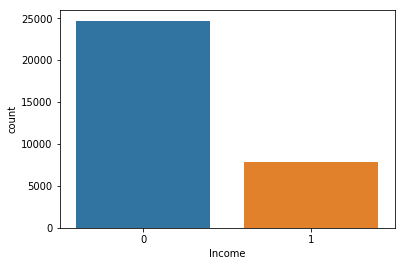

In [49]:
sns.countplot(df['Income'],label="Count")
plt.show()

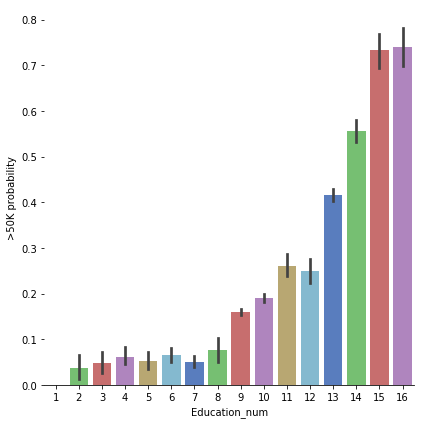

In [50]:
# Explore Education Num vs Income
g = sns.factorplot(x="Education_num",y="Income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

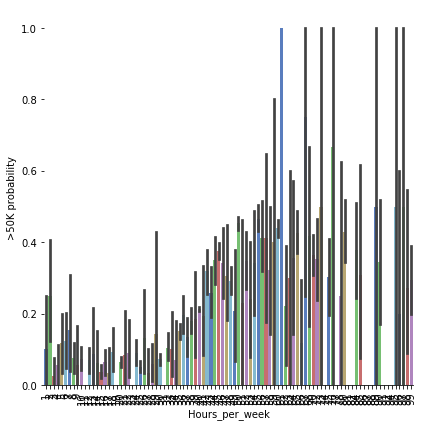

In [63]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="Hours_per_week",y="Income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")
g.set_xticklabels(rotation=90)

C:\Users\Velmurugan R\Anaconda_new\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Velmurugan R\Anaconda_new\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


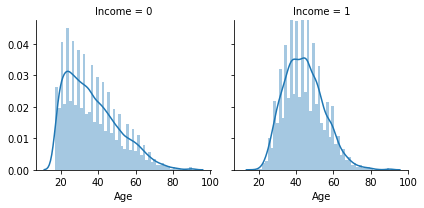

In [54]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='Income')
g = g.map(sns.distplot, "Age")
plt.show()

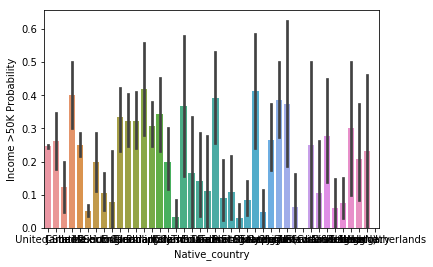

In [70]:
# Explore Native Nation vs Income
g = sns.barplot(x="Native_country",y="Income",data=df)
g = g.set_ylabel("Income >50K Probability")
#g.set_xticklabels(rotation=90)
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.show()

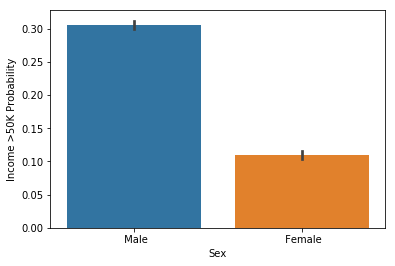

In [71]:
# Explore Sex vs Income
g = sns.barplot(x="Sex",y="Income",data=df)
g = g.set_ylabel("Income >50K Probability")
plt.show()

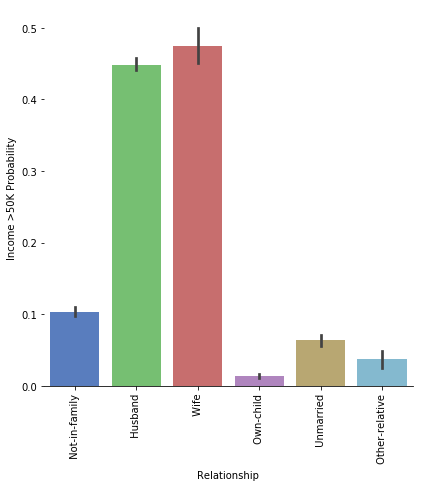

In [85]:
# Explore Relationship vs Income
g = sns.factorplot(x="Relationship",y="Income",data=df,kind="bar", size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=90)
plt.show()

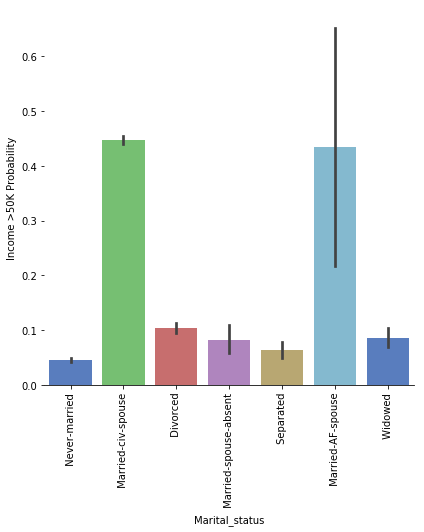

In [84]:
# Explore Marital Status vs Income
g = sns.factorplot(x="Marital_status",y="Income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=90)
plt.show()

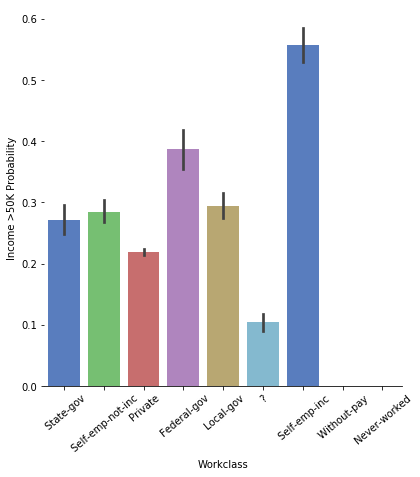

In [88]:
# Explore Workclass vs Income
g = sns.factorplot(x="Workclass",y="Income",data=df,kind="bar", size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=40)
plt.show()

In [23]:
df = df.drop(['Education_num'], axis=1)

In [24]:
obj_cols = df.dtypes[df.dtypes == 'object'].index

In [25]:
obj_cols

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country'],
      dtype='object')

In [33]:
df.Education.value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

In [38]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [42]:
df["Education"] = df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad'], 'school')

In [40]:
df["Education"] = df["Education"].replace([' Assoc-voc',' Assoc-voc',' Some-college'], 'College')

In [ ]:
##df[['Education', 'Education_num']].groupby(['Education'], as_index=False).mean().sort_values(by='Education_num', ascending=False)

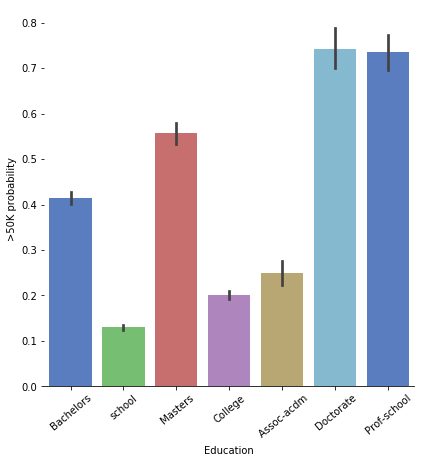

In [43]:
# Explore Education vs Income
g = sns.factorplot(x="Education",y="Income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")
g = g.set_xticklabels(rotation=40)

In [44]:
for cols in obj_cols:
    df = df.join(pd.get_dummies(df[cols], prefix=cols).iloc[:,:-1])

In [45]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,0,0,0,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,0,0,0,0,0,1,0
2,38,Private,215646,school,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,0,0,0,0,0,0,0,0,1,0
3,53,Private,234721,school,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0,0,0,0,0,0,0,0,1,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
cols=df.columns

In [47]:
df.dtypes

Age                                             int8
Workclass                                     object
Fnlwgt                                         int32
Education                                     object
Marital_status                                object
Occupation                                    object
Relationship                                  object
Race                                          object
Sex                                           object
Capital_gain                                   int32
Capital_loss                                   int32
Hours_per_week                                 int32
Native_country                                object
Income                                         int64
Workclass_ ?                                   uint8
Workclass_ Federal-gov                         uint8
Workclass_ Local-gov                           uint8
Workclass_ Never-worked                        uint8
Workclass_ Private                            

In [48]:
df_new = df.drop(obj_cols, axis=1)

In [49]:
df_new.head()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,38,215646,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,234721,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,338409,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x = df_new.drop('Income', axis=1)
y = df_new['Income']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

### Random forest

In [53]:
rndf = RandomForestClassifier(n_estimators=150)

In [54]:
rndf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': rndf.feature_importances_})

In [56]:
importance = importance.sort_values(by='importance', ascending=False)

In [57]:
import seaborn as sns
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

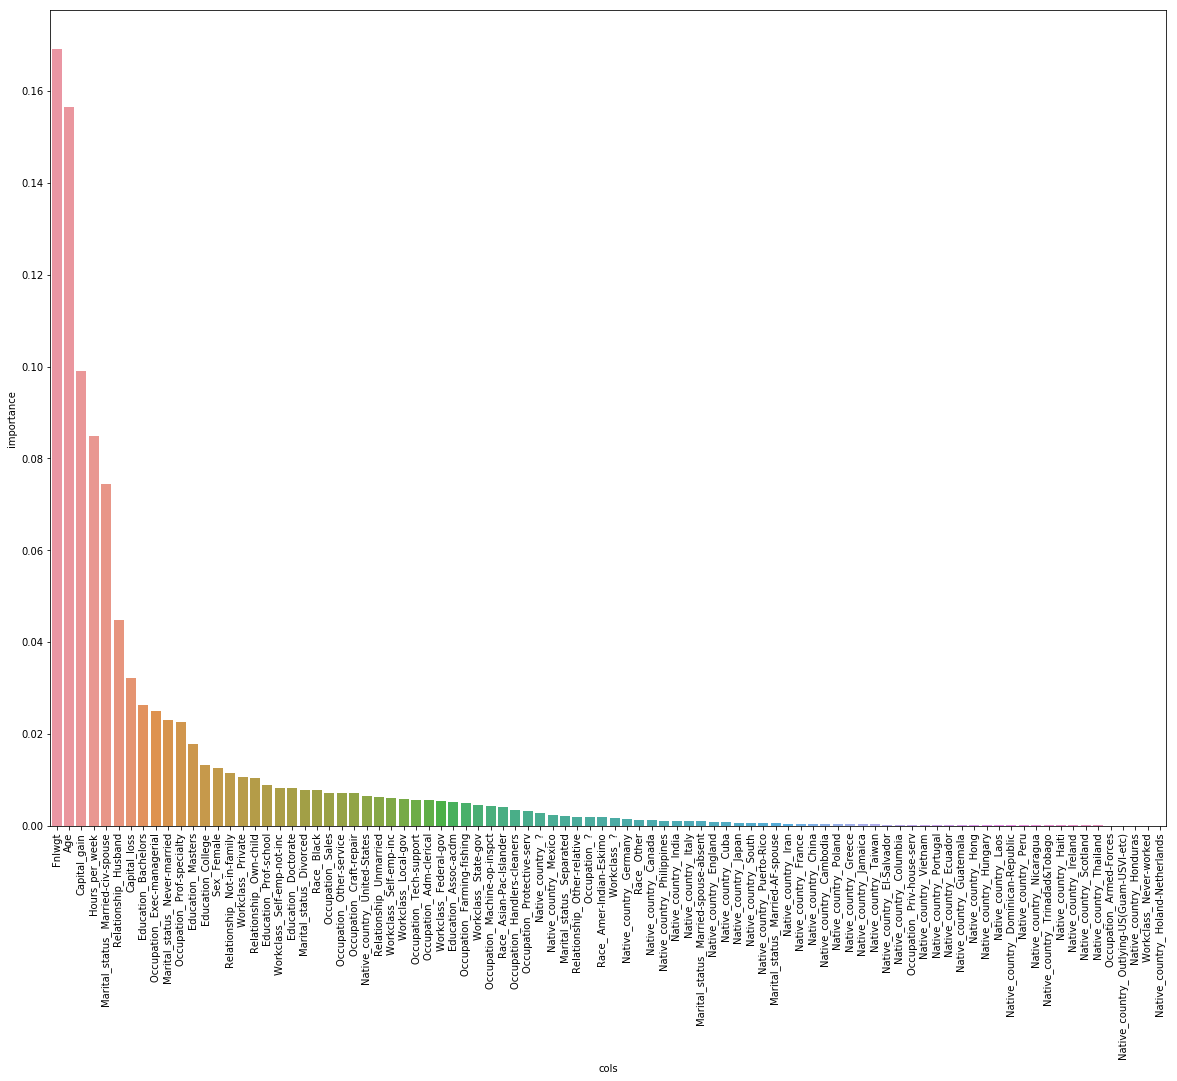

In [58]:
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

### Important Factors

In [70]:
imp_cols = importance[importance.importance >= 0.05].cols.values

In [71]:
imp_cols

array(['Fnlwgt', 'Age', 'Capital_gain', 'Hours_per_week',
       'Marital_status_ Married-civ-spouse'], dtype=object)

So, the important factors are Education, Fnlwgt, Age, Capital_gain, Hours_per_week,Marital_status

## Model Selection

In [59]:
names = ["Decision Tree", "Random Forest", "AdaBoost", "Logisic", "GBM"]

In [60]:
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=100)]

In [61]:
for clf in zip(names, classifiers):
    clf[1].fit(x_train, y_train) #[imp_cols]
    print(clf[0], clf[1].score(x_test, y_test)) #[imp_cols]

Decision Tree 0.8444775563419631
Random Forest 0.852765878189607
AdaBoost 0.8653380517787298
Logisic 0.8021978021978022
GBM 0.8676662320730117


 The Random Forest, AdaBoost and GBM models gives the better accuaracy

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
for clf in zip(names, classifiers):
    print(clf[0])
    pred = clf[1].predict(x_test)
    print(confusion_matrix(pred, y_test))
    print(classification_report(pred, y_test)) # [imp_cols]
    print('*'*20)

Decision Tree
[[7740 1245]
 [ 425 1328]]
             precision    recall  f1-score   support

          0       0.95      0.86      0.90      8985
          1       0.52      0.76      0.61      1753

avg / total       0.88      0.84      0.86     10738

********************
Random Forest
[[7581  997]
 [ 584 1576]]
             precision    recall  f1-score   support

          0       0.93      0.88      0.91      8578
          1       0.61      0.73      0.67      2160

avg / total       0.86      0.85      0.86     10738

********************
AdaBoost
[[7689  970]
 [ 476 1603]]
             precision    recall  f1-score   support

          0       0.94      0.89      0.91      8659
          1       0.62      0.77      0.69      2079

avg / total       0.88      0.87      0.87     10738

********************
Logisic
[[7908 1867]
 [ 257  706]]
             precision    recall  f1-score   support

          0       0.97      0.81      0.88      9775
          1       0.27      0.73

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

### Random search CV

In [65]:
param_dist = {"max_depth": [5, None],
              #"max_features": sp_randint(2, 11),
              "n_estimators": sp_randint(50, 150),
              "min_samples_split": sp_randint(2, 6),
              "min_samples_leaf": sp_randint(1, 6),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
             }

In [66]:
rscv = RandomizedSearchCV(classifiers[1], param_distributions=param_dist, n_iter=10, verbose=1)

In [72]:
rscv.fit(x_train[imp_cols], y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   50.1s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [5, None], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018ABFAC90B8>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018ABFAC9F28>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018ABFAC9E10>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state

In [73]:
rscv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 58}

In [74]:
y_test_pred = rscv.predict(x_test[imp_cols])

In [75]:
rscv.score(x_test[imp_cols], y_test)

0.821475135034457

### Grid search CV

In [76]:
param_dist = {"max_depth": [5, None],
              #"max_features": sp_randint(2, 11),
              "n_estimators": [50, 100, 150],
              "min_samples_split": [2, 3, 4, 5],
              "min_samples_leaf": [2,3,4,5,6]
             }

In [77]:
rscv_grid = GridSearchCV(classifiers[1], param_grid=param_dist, verbose=1)

In [78]:
rscv_grid.fit(x_train[imp_cols], y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, None], 'n_estimators': [50, 100, 150], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [79]:
rscv_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [80]:
model = rscv_grid.best_estimator_
model.fit(x_train[imp_cols], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
model.score(x_test[imp_cols], y_test)

0.8205438629167443

### Lift Gain and KS Statistics

In [82]:
predict_probas = rscv.predict_proba(x_test[imp_cols])
y_test_pred = rscv.predict(x_test[imp_cols])

In [83]:
predict_probas

array([[0.64588927, 0.35411073],
       [0.61865828, 0.38134172],
       [0.92920195, 0.07079805],
       ...,
       [0.92985015, 0.07014985],
       [0.84228836, 0.15771164],
       [0.47932209, 0.52067791]])

In [84]:
new_df = pd.DataFrame.from_dict({'target': y_test,'predict':y_test_pred, 'pred_prob_0':predict_probas[:,0], 'pred_prob_1': predict_probas[:,1]})

In [85]:
new_df

,target,predict,pred_prob_0,pred_prob_1
24690,0,0,0.645889,0.354111
23644,0,0,0.618658,0.381342
30048,0,0,0.929202,0.070798
29182,1,1,0.470919,0.529081
22661,0,0,0.592443,0.407557
30116,0,0,0.933066,0.066934
1141,0,0,0.967950,0.032050
27706,0,1,0.467320,0.532680
1401,0,0,0.666748,0.333252
29412,0,0,0.615363,0.384637


In [86]:
new_df = new_df.sort_values(by='pred_prob_1', ascending=False)

In [87]:
splits = np.array_split(new_df.values, 10)

In [88]:
ks_df = pd.DataFrame(columns=['count', '1s', '0s', 'pos_per', 'neg_per'])

In [89]:
list_of_dict = []

In [90]:
for split in splits:
    cnt = split.shape[0]
    pred_target_pos = split[:,3].sum()
    pred_target_neg = cnt - pred_target_pos
    pos_per = pred_target_pos / cnt
    neg_per = pred_target_neg / cnt
    list_of_dict.append({'count': cnt, '1s': pred_target_pos, '0s': pred_target_neg, 'pos_per': pos_per, 'neg_per': neg_per})

In [91]:
metric_data = pd.DataFrame.from_dict(list_of_dict)

In [92]:
metric_data

,0s,1s,count,neg_per,pos_per
0,296.632559,777.367441,1074,0.276194,0.723806
1,565.516550,508.483450,1074,0.526552,0.473448
2,653.095781,420.904219,1074,0.608097,0.391903
3,700.022803,373.977197,1074,0.651790,0.348210
4,835.044346,238.955654,1074,0.777509,0.222491
5,960.452368,113.547632,1074,0.894276,0.105724
6,1003.798030,70.201970,1074,0.934635,0.065365
7,1021.911435,52.088565,1074,0.951500,0.048500
8,1051.986505,21.013495,1073,0.980416,0.019584
9,1065.916630,7.083370,1073,0.993399,0.006601


In [93]:
metric_data['0s_cumsum'] = metric_data['0s'].cumsum()
metric_data['1s_cumsum'] = metric_data['1s'].cumsum()
metric_data['0s_cumsum_per'] = metric_data['0s_cumsum'] / metric_data['0s'].sum()
metric_data['1s_cumsum_per'] = metric_data['1s_cumsum'] / metric_data['1s'].sum()
metric_data['cum_pop_%'] = (metric_data.index + 1) * 10

In [94]:
metric_data['lift_decile'] = 1000 * metric_data['1s'] / metric_data['1s'].sum()
metric_data['lift_total'] = 10000 * metric_data['1s_cumsum_per'] / metric_data['cum_pop_%']
metric_data['ks'] = metric_data['1s_cumsum_per'] - metric_data['0s_cumsum_per']

In [95]:
metric_data

,0s,1s,count,neg_per,pos_per,0s_cumsum,1s_cumsum,0s_cumsum_per,1s_cumsum_per,cum_pop_%,lift_decile,lift_total,ks
0,296.632559,777.367441,1074,0.276194,0.723806,296.632559,777.367441,0.036377,0.300883,10,300.882692,300.882692,0.264506
1,565.516550,508.483450,1074,0.526552,0.473448,862.149109,1285.850891,0.105728,0.497693,20,196.810236,248.846464,0.391965
2,653.095781,420.904219,1074,0.608097,0.391903,1515.244890,1706.755110,0.185820,0.660605,30,162.912399,220.201775,0.474786
3,700.022803,373.977197,1074,0.651790,0.348210,2215.267694,2080.732306,0.271666,0.805354,40,144.749136,201.338616,0.533688
4,835.044346,238.955654,1074,0.777509,0.222491,3050.312040,2319.687960,0.374071,0.897843,50,92.488592,179.568611,0.523773
5,960.452368,113.547632,1074,0.894276,0.105724,4010.764408,2433.235592,0.491854,0.941792,60,43.948994,156.965342,0.449938
6,1003.798030,70.201970,1074,0.934635,0.065365,5014.562438,2503.437562,0.614953,0.968964,70,27.171909,138.423423,0.354010
7,1021.911435,52.088565,1074,0.951500,0.048500,6036.473873,2555.526127,0.740274,0.989125,80,20.161055,123.640627,0.248851
8,1051.986505,21.013495,1073,0.980416,0.019584,7088.460378,2576.539622,0.869283,0.997258,90,8.133344,110.806484,0.127975
9,1065.916630,7.083370,1073,0.993399,0.006601,8154.377008,2583.622992,1.000000,1.000000,100,2.741642,100.000000,0.000000


Text(0,0.5,'ks')

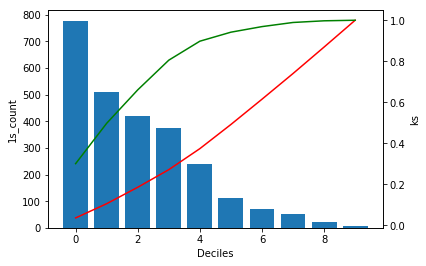

In [96]:
fig, ax1 = plt.subplots()

ax1.bar(metric_data.index, metric_data['1s'])
ax1.set_ylabel('1s_count')
ax1.set_xlabel('Deciles')
ax2 = ax1.twinx()

ax2.plot(metric_data['0s_cumsum_per'], color='red')
ax2.plot(metric_data['1s_cumsum_per'], color='green')
ax2.set_ylabel('ks')